Three Observations
1. The drug regimen Capomulin is clearly out performed the rest of the regimens.  The Capomulin mouse tumors decreased as the study progressed.  

2.  The mouse under the other regimens studies were more likely to die.

3. Although Capomulin looks like the winner, all of the regimens had potental outliers, which could have screwed the results. 

Matplotlib Homework - The Power of Plots

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv('Mouse_metadata.csv')
study_results = pd.read_csv('Study_results.csv')

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#review the data types
mouse_study_df.dtypes


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [6]:
#check each column for data issues
mouse_study_df["Drug Regimen"].value_counts().sort_index()

Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation
#SEM for the Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol
#scipy.stats' sem()
find_mean = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
find_median = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
find_variance = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
find_standard_deviation = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
find_SEM = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_statistics_df = pd.DataFrame({"Mean":find_mean, "Median": find_median, "Variance": find_variance, "Standard Deviation": find_standard_deviation,
                                     "SEM": find_SEM})
summary_statistics_df 

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar plots

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_plot_df = pd.DataFrame(mouse_study_df.groupby(["Drug Regimen"]).count()).reset_index()
#Which columns do you want to look in
datapoints = bar_plot_df[["Drug Regimen", "Mouse ID"]]
#Rename the column so they make sense to audience
datapoints =datapoints.rename(columns={"Mouse ID": "Count"})
#set the index
datapoints = datapoints.set_index("Drug Regimen")

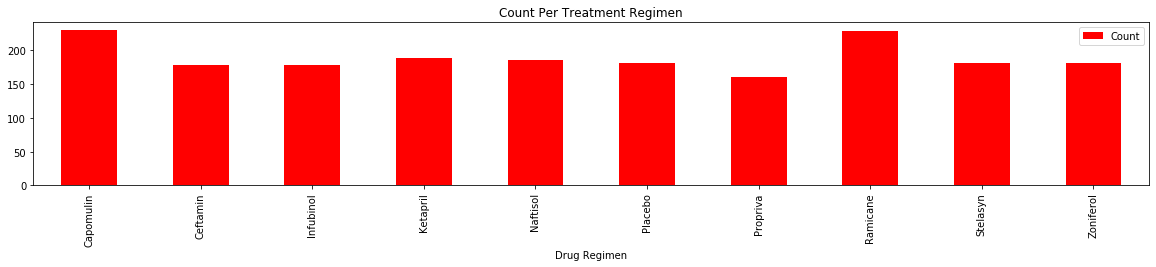

<Figure size 432x288 with 0 Axes>

In [9]:

datapoints.plot(kind="bar", facecolor="red", figsize=(20,3))

plt.title("Count Per Treatment Regimen")

plt.show()
plt.tight_layout()


In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimens = summary_statistics_df.index.tolist()
regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [11]:
#check each column for data issues
mouse_study_df["Age_months"].value_counts().sort_index()

1      60
2      87
3     107
4      74
5      63
6      54
7      95
8     142
9      74
10     53
11     71
12     58
13     69
14     48
15     37
16     58
17     79
18    112
19     69
20    100
21    116
22     83
23    106
24     78
Name: Age_months, dtype: int64

In [12]:
treatment_count = (mouse_study_df.groupby(['Drug Regimen'])['Age_months'].count()).tolist()
treatment_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

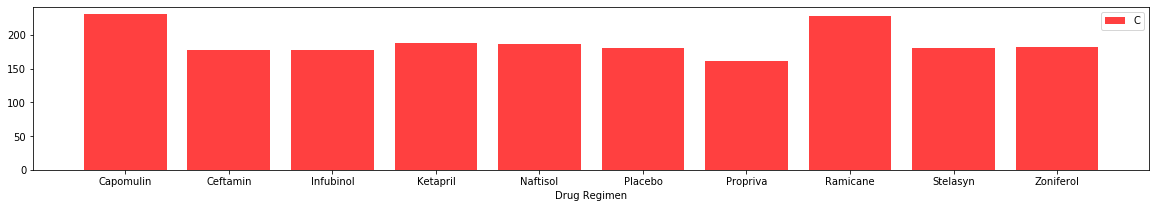

In [13]:

x_axis = np.arange(len(treatment_count))
x_axis = regimens
plt.figure(figsize=(20,3))
plt.bar(x_axis, treatment_count, color='r', alpha=0.75, align="center")
plt.xlabel('Drug Regimen')
plt.legend('Count')

 Pie plots

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
FvsM_df = pd.DataFrame(mouse_study_df.groupby(["Sex"]).count()).reset_index()
FvsM_df = FvsM_df[["Sex", "Mouse ID"]]
FvsM_df = FvsM_df.rename(columns={"Mouse ID": "Total"})
FvsM_df.head()

,Sex,Total
0,Female,935
1,Male,958


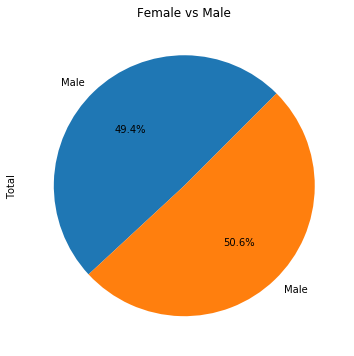

In [15]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
FvsM_df.plot(kind="pie", y="Total", ax=ax, autopct='%1.1f%%', labels=mouse_study_df["Sex"],startangle=45, shadow=False, legend=False, title="Female vs Male")


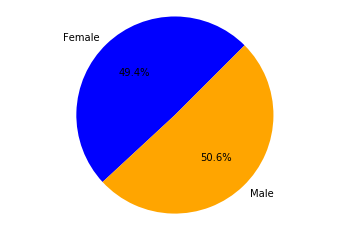

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
FvsM_count = (mouse_study_df.groupby(["Sex"])["Age_months"].count()).tolist()

 # Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the shapes
explode = (0.0, 0)
plt.title="Female vs Male"
plt.pie(FvsM_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=45)
#ensure the shape is a circle
plt.axis("equal")

#save the chart as an image
#plt.savefig("Images/Pypies.png")
#display the chart
plt.show()

Quartiles, outliers and boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
tumor_df = mouse_study_df.sort_values(['Drug Regimen', "Timepoint",'Tumor Volume (mm3)'], ascending=True)
mostProm_df = tumor_df.loc[tumor_df["Timepoint"]==45]
mostProm_df.head(150).reset_index()



,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,19,s185,Capomulin,Female,3,17,45,23.343598,1
1,39,m601,Capomulin,Male,22,17,45,28.430964,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,104,u364,Capomulin,Male,18,17,45,31.023923,3
4,124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...,...
125,874,g296,Zoniferol,Female,14,29,45,68.163195,4
126,1719,w575,Zoniferol,Female,16,28,45,68.401286,3
127,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
128,1434,q633,Zoniferol,Male,12,25,45,70.827796,2


In [18]:
drugone = mouse_study_df[["Drug Regimen", "Tumor Volume (mm3)"]]
drugone

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [19]:
drugone = drugone.loc[drugone["Drug Regimen"]=="Capomulin"]
drugone

,Drug Regimen,Tumor Volume (mm3)
10,Capomulin,45.000000
11,Capomulin,43.878496
12,Capomulin,37.614948
13,Capomulin,38.177232
14,Capomulin,36.866876
...,...,...
440,Capomulin,47.685963
1452,Capomulin,45.000000
1453,Capomulin,45.597064
1454,Capomulin,46.059608


In [20]:
#create datafromes out of the Tumor Volume column, then isolate each Treatment
capomulin = drugone.sort_values(["Tumor Volume (mm3)"], ascending=False).reset_index()
capomulin = capomulin["Tumor Volume (mm3)"]
capomulin.head(4)

0    48.158209
1    48.070452
2    47.685963
3    47.488599
Name: Tumor Volume (mm3), dtype: float64

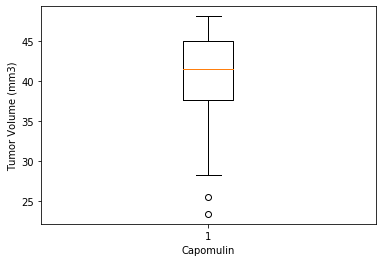

In [56]:
#box plot for capomulin 


fig1, ax1 = plt.subplots()
ax1.set_xlabel('Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin)
plt.savefig("CapomulinBoxPlot.png")
plt.show()
              

In [22]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Capomulin. 
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
The the median of Capomulin is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [23]:
#create datafromes out of the Tumor Volume column, the isolate each Treatment
drugtwo = mouse_study_df[["Drug Regimen", "Tumor Volume (mm3)"]]
drugtwo= drugtwo.loc[drugtwo["Drug Regimen"]=="Ramicane"]
ramicane = drugtwo.sort_values(["Tumor Volume (mm3)"], ascending=False).reset_index()
ramicane = ramicane["Tumor Volume (mm3)"]
ramicane.head(4)

0    47.622816
1    47.227171
2    47.001465
3    46.940945
Name: Tumor Volume (mm3), dtype: float64

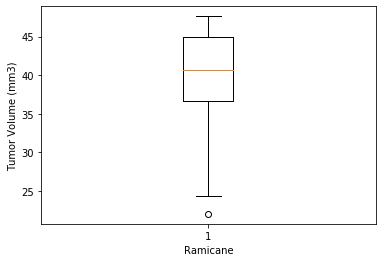

In [55]:

fig2, ax2 = plt.subplots()

ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Ramicane')
ax2.boxplot(ramicane)
plt.savefig("RamicaneBoxPlot.png")
plt.show()

In [25]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Ramicane. 
quartiles = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 36.67463458499999
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415000007
The the median of Ramicane is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


In [26]:
#create datafromes out of the Tumor Volume column, the isolate each Treatment
drugthree = mouse_study_df[["Drug Regimen", "Tumor Volume (mm3)"]]
drugthree= drugthree.loc[drugthree["Drug Regimen"]=="Infubinol"]
infubinol = drugthree.sort_values(["Tumor Volume (mm3)"], ascending=False).reset_index()
infubinol = infubinol["Tumor Volume (mm3)"]
infubinol.head(4)

0    72.226731
1    69.428141
2    67.973419
3    67.821420
Name: Tumor Volume (mm3), dtype: float64

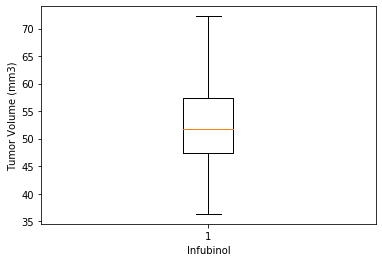

In [54]:

fig3, ax3 = plt.subplots()
ax3.set_xlabel('Infubinol')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(infubinol)
plt.savefig("InfubinolBoxPlot.png")
plt.show()

In [28]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Infubinol. 
quartiles = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinolis: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinolis: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
The the median of Infubinol is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


In [29]:
#create datafromes out of the Tumor Volume column, the isolate each Treatment
drugfour = mouse_study_df[["Drug Regimen", "Tumor Volume (mm3)"]]
drugfour = drugfour.loc[drugfour["Drug Regimen"]=="Ceftamin"]
ceftamin = drugfour.sort_values(["Tumor Volume (mm3)"], ascending=False).reset_index()
ceftamin = ceftamin["Tumor Volume (mm3)"]
ceftamin.head(4)

0    68.923185
1    68.594745
2    67.748662
3    67.527482
Name: Tumor Volume (mm3), dtype: float64

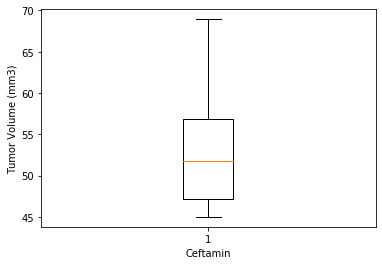

In [53]:

fig4, ax4 = plt.subplots()
ax4.set_xlabel('Ceftamin')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(ceftamin)
plt.savefig("CeftaminBoxPlot.png")
plt.show()

In [31]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Ceftamin.
quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 47.208427112500004
The upper quartile of Ceftamin is: 56.801437570000004
The interquartile range of Ceftamin is: 9.5930104575
The the median of Ceftamin is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


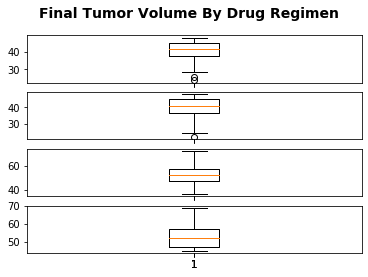

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.suptitle("Final Tumor Volume By Drug Regimen", fontsize=14, fontweight="bold")

ax1 = ax1.boxplot(capomulin)
ax2 = ax2.boxplot(ramicane)
ax3 = ax3.boxplot(infubinol)
ax4 = ax4.boxplot(ceftamin)
plt.savefig("FinalBoxPlot.png")
plt.show()


 Line and scatter plots

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_data = mouse_study_df.loc[mouse_study_df['Drug Regimen']== "Capomulin"]
capomulin_data = capomulin_data.reset_index()
capomulin_data.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


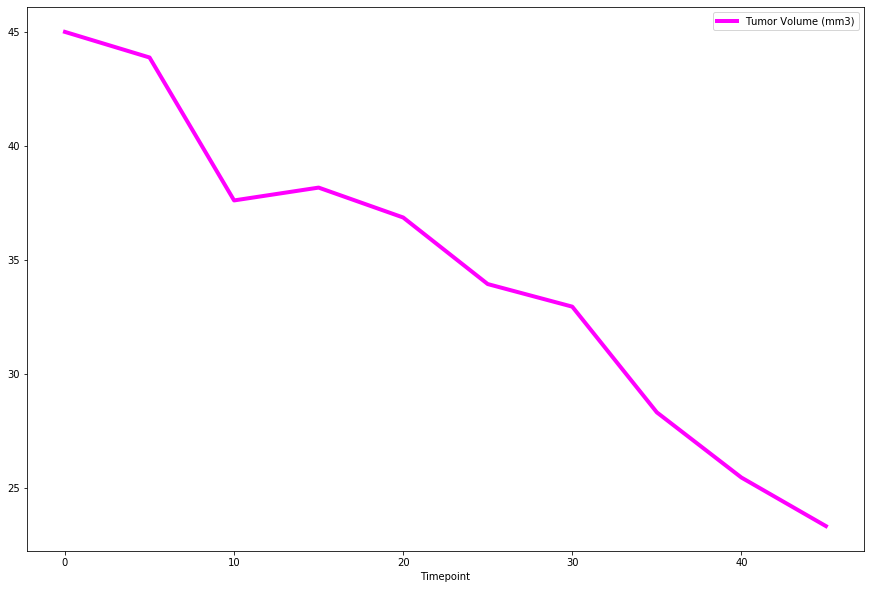

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Retrieve data from capmulin_data for one mouse id #show data
 
mouse_s185 = capomulin_data.loc[capomulin_data['Mouse ID'] == 's185']
mouse_s185
 
# Only show the Tumor Volume(mm3) and Timepoint columns from the mouse_s185 df
mouse_s185 = mouse_s185.loc[:, ['Timepoint', 'Tumor Volume (mm3)']]
mouse_s185 = mouse_s185.reset_index(drop=True)
 
#Line Plot for Timepoint as x axis  vs Tumor Volume (mm3) as y axis to show progression as time passed
mouse_s185.set_index('Timepoint').plot(figsize=(15, 10), linewidth=4.0, color= 'magenta')

 


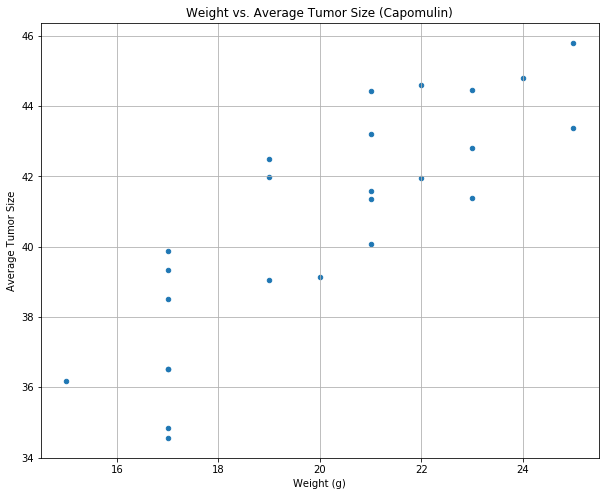

In [34]:
# Only show the Mouse id, Tumor Volume(mm3) and Weight (g) columns from the capmulin_data df
isolated_data = capomulin_data.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
isolated_data.head()

# Calculate the average Tumor volume and Rename the tumor volume column so to show a calculation was performed on the column to get the displayed value
 
avg_size = pd.DataFrame(isolated_data.groupby(['Mouse ID', 'Weight (g)']) ['Tumor Volume (mm3)'].mean()).reset_index()
 
avg_size = avg_size.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Size'})
 
# set the index on the mouse id column
avg_size = avg_size.set_index('Mouse ID')
 
avg_size.head(10)
 
  #Generate the Scatter Plot (mouse weight vs avg tumor size) 
 
avg_size.plot(kind='scatter', x='Weight (g)', y='Average Tumor Size', grid=True, figsize=(10,8), title= 'Weight vs. Average Tumor Size (Capomulin)')

In [35]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Plot the Linear Regression on top of the previous Scatter plot (How?)
# clear the previous figure
plt.clf()
#clear the axis on the last scatter plot
plt.cla()
#close the previous show function
plt.close()




In [36]:
#Calculate the Correlation Coefficient and Linear Regression model (Mouse Weight and Avg tumor size)
mouse_weight = avg_size.iloc[:, 0]
avg_volume = avg_size.iloc[:, 1]
correlation = st.pearsonr(mouse_weight, avg_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.8419363424694718


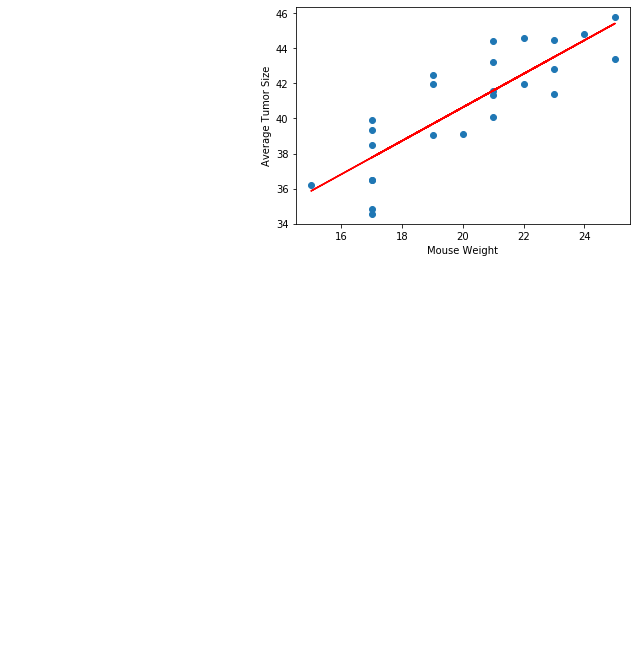

In [45]:
#Update the previous Scatter plot with the linear regression equation and line plot
#import linregress to prevent the linregress not defined error
from scipy.stats import linregress
x_data = avg_size['Weight (g)']
y_data = avg_size['Average Tumor Size']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_data = x_data * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_data, y_data)
plt.plot(x_data, regress_data, "r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Size')
print(f"The r-squared is: {rvalue}")
plt.show()

